In [2097]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2098]:
df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv') 

Data Cleansing

In [2099]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [2100]:
df.isna().sum() 

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [2101]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [2102]:
df.head()
df = df.head(10000) 

In [2103]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        10000 non-null  object 
 1   Date        10000 non-null  object 
 2   PM2.5       8708 non-null   float64
 3   PM10        6028 non-null   float64
 4   NO          8945 non-null   float64
 5   NO2         9004 non-null   float64
 6   NOx         8834 non-null   float64
 7   NH3         6976 non-null   float64
 8   CO          9023 non-null   float64
 9   SO2         8883 non-null   float64
 10  O3          8731 non-null   float64
 11  Benzene     8219 non-null   float64
 12  Toluene     7642 non-null   float64
 13  Xylene      3519 non-null   float64
 14  AQI         8640 non-null   float64
 15  AQI_Bucket  8640 non-null   object 
dtypes: float64(13), object(3)
memory usage: 1.2+ MB


# Set các giá trị NaN thành 0

In [2104]:
print(df.columns.difference([df.columns[-1]], sort=False)) 

df = df.fillna(0) 
for x in df.columns.difference([df.columns[-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
 
df = df.drop([df.columns[i] for i in range(0,2)], axis=1)
df = df.mask(df==0).fillna(df.mean()) 
df.to_csv(r'./File Name.csv', index=False)
df.to_numpy()

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


/tmp/ipykernel_46724/3797093720.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.mask(df==0).fillna(df.mean())


array([[43.040555000000005, 56.73088700000001, 0.92, ..., 1.53605,
        140.2403, nan],
       [43.040555000000005, 56.73088700000001, 0.97, ..., 3.77, 140.2403,
        nan],
       [43.040555000000005, 56.73088700000001, 17.4, ..., 2.25, 140.2403,
        nan],
       ...,
       [37.83, 47.3, 10.56, ..., 1.53605, 84.0, 'Satisfactory'],
       [43.18, 49.36, 11.09, ..., 1.53605, 67.0, 'Satisfactory'],
       [36.48, 43.78, 11.36, ..., 1.53605, 70.0, 'Satisfactory']],
      dtype=object)

# Thay các giá trị String của cột AQI_Bucket thành các giá trị One-Hot

In [2105]:
df = df.drop(df.columns[-1], axis = 1)
lastCol = df.columns[-1] 

# Loại bỏ tất cả các hàng có giá trị AQI_Bucket = 0
df = df[df.AQI != 0] 
 
categorical_vars = [lastCol]

y = df[categorical_vars]
# X = df[[df.columns[i] for i in range(0,9)]]  
X = df[[df.columns[i] for i in [0,3,6]]]  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train
y_train

y_train.to_numpy()
X_train.to_numpy()

(7000, 3) (3000, 3) (7000, 1) (3000, 1)


array([[49.04    , 19.92    ,  0.64    ],
       [28.4     , 23.56    ,  0.75    ],
       [23.73    , 15.87    ,  0.73    ],
       ...,
       [43.040555, 23.946045,  4.013139],
       [24.18    , 30.54    ,  0.56    ],
       [33.41    , 14.86    , 17.12    ]])

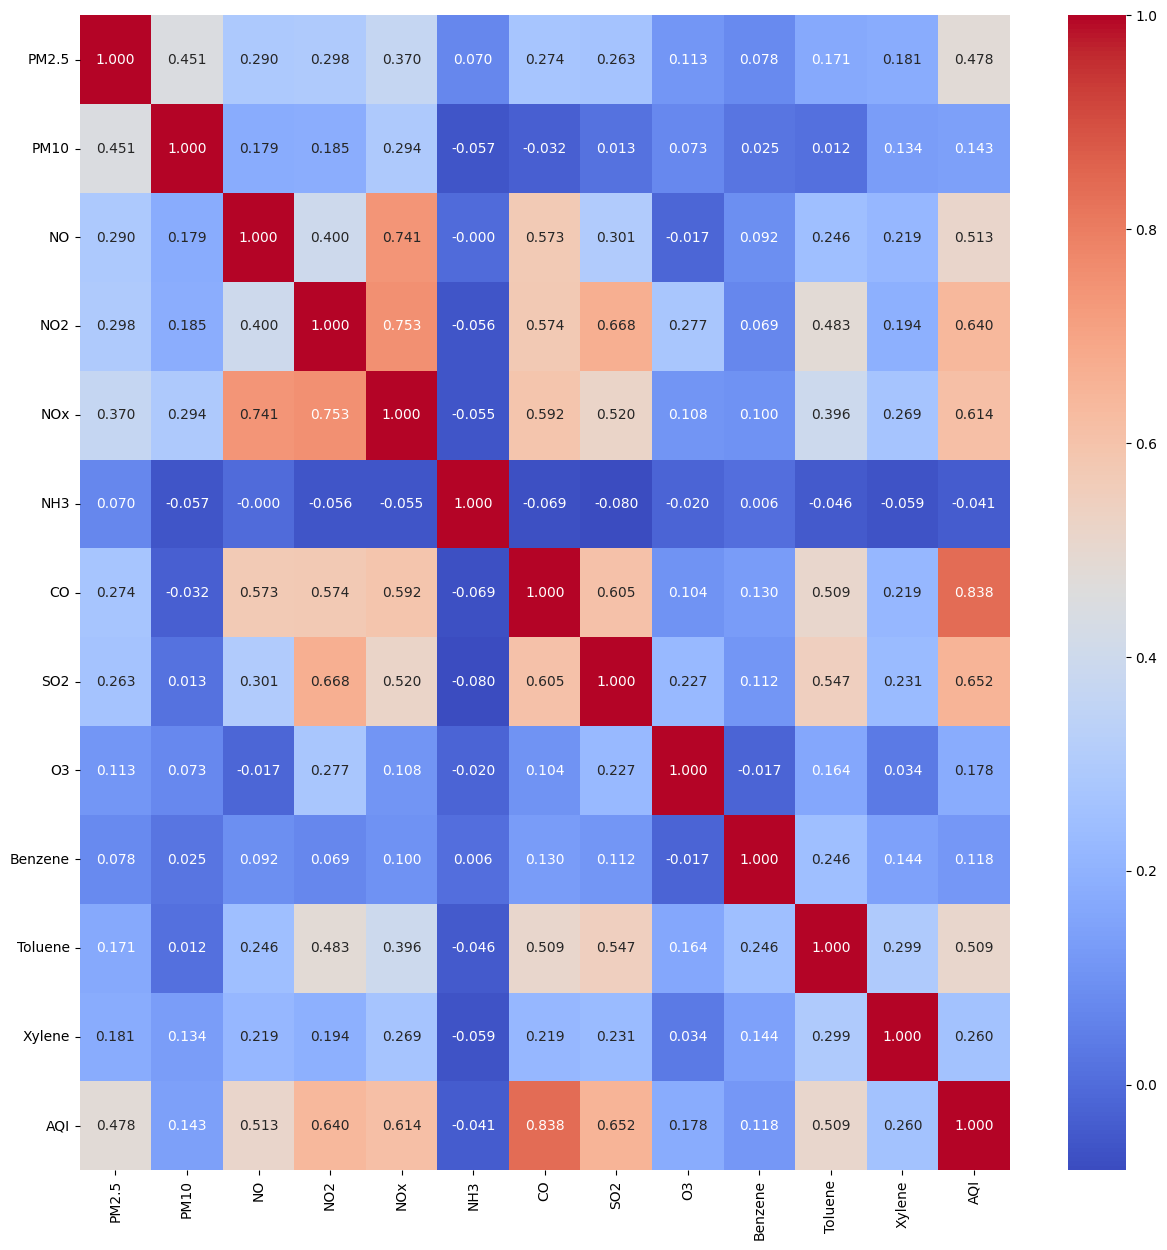

In [2106]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df.columns, yticklabels=df.columns)
figure= plt.gcf()
figure.set_size_inches(15,15)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [2107]:
corr_matrix.unstack().sort_values().drop_duplicates()

SO2    NH3      -0.080071
NH3    CO       -0.068783
       Xylene   -0.059021
PM10   NH3      -0.056861
NH3    NO2      -0.056280
                   ...   
NO2    SO2       0.668254
NO     NOx       0.741076
NOx    NO2       0.753058
AQI    CO        0.837742
PM2.5  PM2.5     1.000000
Length: 79, dtype: float64

In [2108]:
model = LinearRegression()
model.fit(X_train, y_train )

accuracy = model.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100)) 

Accuracy: 70.26


# linear reg

In [2109]:
import numpy as np
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2
np.nan_to_num(np.inf)

class LinearRegression2:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        print()
        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias 
            np.nan_to_num(y_predicted)
            # compute gradients
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            np.nan_to_num(dw)

            db = (1 / n_samples) * np.sum(y_predicted - y)
            print('y pred')
            print(y_predicted)
            
            # update parameters
            self.weights -= self.lr * dw
            # np.nan_to_num(self.weights)
            self.bias -= self.lr * db

    def predict(self, X):
        # print(self.weights)
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [2110]:
model2 = LinearRegression2()    

# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy().flatten()
# print(X_train.to_numpy())

print(y_train)

model2.fit(X_train.to_numpy(), y_train.to_numpy().flatten())
predictions = model2.predict(X_test)

# # print(X_train)
# print(predictions)


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test.to_numpy().flatten(), predictions)

print("MSE:", mse)

accu = r2_score(y_test.to_numpy().flatten(), predictions)
print("Accuracy:", accu)

           AQI
2228  105.0000
5910   78.0000
1950  130.0000
2119   20.0000
5947   71.0000
...        ...
2895   66.0000
7813   78.0000
905   140.2403
5192   60.0000
235   302.0000

[7000 rows x 1 columns]

y pred
[0. 0. 0. ... 0. 0. 0.]
y pred
[653.28197826 462.63252535 360.36474715 ... 626.1063526  466.40101047
 492.3158646 ]
y pred
[-1597.7123536  -1071.89321767  -849.43628302 ... -1484.20982191
 -1039.94280871 -1120.63291842]
y pred
[5982.42399238 4116.13855615 3235.97744235 ... 5644.79028982 4066.61290653
 4372.21407333]
y pred
[-19639.2176628  -13414.65805427 -10569.72679449 ... -18439.28345061
 -13186.2033557  -14143.18267576]
y pred
[66901.98569493 45797.6059491  36061.43375549 ... 62916.85672869
 45085.44743968 48440.32147432]
y pred
[-225451.87253461 -154236.6222738  -121469.21184503 ... -211914.49821863
 -151774.44865321 -162939.01729764]
y pred
[762140.01776618 521489.21326926 410678.89419774 ... 716490.40456139
 513224.55995223 551152.41361216]
y pred
[-2574049.27860515 -17

/tmp/ipykernel_46724/178817553.py:35: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * dw


y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y pred
[nan nan nan ... nan nan nan]
y